### Import Libraries and Load Data

In [1]:
import pandas as pd

# Load the dataset
data_path = '/Users/duii/Desktop/crime_prevention_analysis/datasets/causal_inference_data_rf.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Unnamed: 0,Month,crime_count,ethnic_percent_in_ethnic_population,house_price_to_earning_ratio,economically_inactive_percent,unemployed_percent,qualification_index_score,no_qualifications,level_4_qualifications_and_above
0,0,2021-01-01,95,0.108298,13.61,40.9,2.7,2.3,19.5,27.9
1,1,2021-02-01,88,0.108298,13.61,40.9,2.7,2.3,19.5,27.9
2,2,2021-03-01,130,0.108298,13.61,40.9,2.7,2.3,19.5,27.9
3,3,2021-04-01,121,0.108298,13.61,40.9,2.7,2.3,19.5,27.9
4,4,2021-05-01,145,0.108298,13.61,40.9,2.7,2.3,19.5,27.9


Involves importing the necessary Python libraries and loading the dataset. 
Here's the detailed breakdown:
**Purpose**: 
The initial step in any data analysis notebook typically involves setting up the environment by loading the required libraries and the dataset. This cell handles these foundational tasks.

**Code Explanation**:
1. **Importing pandas**:
   - `import pandas as pd`: This line imports the pandas library, which is crucial for data manipulation and analysis in Python. It provides data structures and functions designed to work efficiently with structured data.

2. **Loading the Dataset**:
   - The dataset is loaded from a specified path, which contains the data in CSV (Comma Separated Values) format. The command used is `pd.read_csv(data_path)`, which converts the CSV file into a pandas DataFrame. DataFrames are powerful data structures that allow easy data manipulation and querying.

3. **Displaying Data**:
   - `data.head()`: This function displays the first five rows of the DataFrame. It's a quick way to get a sense of the data structure, including column names and types of data contained in each column.

**Output**:
- The output will be the first few rows of the dataset as mentioned. This display helps in verifying that the data has been loaded correctly and gives a glimpse into the data's format and the types of variables involved.

**Theoretical Concepts**:
- **DataFrames**: Central to pandas, DataFrames are two-dimensional data structures with labeled axes (rows and columns) designed to hold data in a tabular form.
- **CSV Files**: CSV is a simple file format used to store tabular data, such as a spreadsheet or database. Each line of the file is a data record, and each record consists of one or more fields, separated by commas.

This cell sets the stage for subsequent analysis by ensuring that the data is correctly loaded and accessible for future operations. The quick view of the data helps orient further data processing and cleansing steps.


The dataset includes the following columns:

- **Month**: The month and year for the data entry.
- **crime_count**: The target variable we want to predict.
- **ethnic_percent_in_ethnic_population**: A feature potentially indicating some demographic information.
- **house_price_to_earning_ratio**: A feature indicating economic conditions.
- **economically_inactive_percent**: Another economic-related feature.
- **unemployed_percent**: Reflects unemployment levels.
- **qualification_index_score**: Related to educational qualifications.
- **no_qualifications**: Reflects the percentage of population without qualifications.
- **level_4_qualifications_and_above**: Reflects the percentage of population with higher education.


### Data Cleaning and Preprocessing

In [2]:
# Drop the 'Unnamed: 0' column
data.drop('Unnamed: 0', axis=1, inplace=True)

# Convert 'Month' to datetime and extract year and month
data['Month'] = pd.to_datetime(data['Month'])
# data['Year'] = data['Month'].dt.year
data['Month_num'] = data['Month'].dt.month
data.drop('Month', axis=1, inplace=True)

# Check for missing values
missing_values = data.isnull().sum()

missing_values


crime_count                            0
ethnic_percent_in_ethnic_population    0
house_price_to_earning_ratio           0
economically_inactive_percent          0
unemployed_percent                     0
qualification_index_score              0
no_qualifications                      0
level_4_qualifications_and_above       0
Month_num                              0
dtype: int64

**Purpose**:
This cell is crucial for preparing the dataset for further analysis by performing data cleaning and preprocessing tasks. Cleaning data is essential to ensure that the statistical and machine learning models provide reliable and accurate results.

**Code Explanation**:
1. **Removing Unnecessary Columns**:
- `data.drop('Unnamed: 0', axis=1, inplace=True)`: This line of code removes the column labeled 'Unnamed: 0', which typically appears as an artifact from data export processes and usually contains index values that pandas automatically handles.

2. **Converting Date Format**:
- `data['Month'] = pd.to_datetime(data['Month'])`: Converts the 'Month' column to a datetime object, facilitating time-series analysis by enabling easy extraction of date components and alignment of time series data.
- `data['Month_num'] = data['Month'].dt.month`: Extracts the month number from the datetime object, useful for analyses that require numerical month data, such as seasonal patterns.
- `data.drop('Month', axis=1, inplace=True)`: Removes the original 'Month' column after extracting necessary information, simplifying the dataset.

3. **Checking for Missing Values**:
    - `missing_values = data.isnull().sum()`: Generates a summary of missing values across different columns in the dataset. Handling missing data is crucial as they can significantly impact the outcomes of statistical tests and models.

**Output**:
- The output of this cell will be a summary showing the count of missing values for each column in the dataset. If there are missing values, subsequent cells would likely include methods to handle these (e.g., imputation, removal of rows).

**Theoretical Concepts**:
- **Data Imputation**: Refers to techniques used to replace missing or corrupt data with substituted values. When handling missing data, common approaches include using the median or mean of a column, or predictive modeling.
- **Datetime Conversion**: Converting date strings into datetime objects in pandas allows for the robust handling of temporal data, enabling operations like sorting by date, extracting components like year and month, and resampling based on time periods.
- **Feature Engineering**: The process of using domain knowledge to select, modify, or create new features from raw data. Here, extracting the month number from the date can be seen as a feature engineering step that might reveal seasonal trends in the data.

This cell essentially optimizes the dataset by cleaning and reformatting, which is fundamental before any detailed analysis or modeling to ensure accuracy and effectiveness.


### Model Training with Random Forest Regressor

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target variable
X = data.drop('crime_count', axis=1)
y = data['crime_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Recalculating the performance metrics
r2 = r2_score(y_test, y_pred)

print("mse is - ",mse,"rmse is - ", rmse,"r2 is - ", r2)

mse is -  3397.7226091228067 rmse is -  58.289987211551235 r2 is -  0.9820178241750143


The model evaluation metrics—Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R²—reveal high predictive performance of the model:

- **MSE (3397.72)**: This value, though relatively high, needs context regarding the scale and variance of the crime count data. It quantifies the average squared difference between the observed actual outcomes and the outcomes predicted by the model.

- **RMSE (58.29)**: The RMSE, being the square root of the MSE, offers a more interpretable measure in the same units as the response variable (crime counts). An RMSE of 58.29 suggests that the model's predictions are, on average, within approximately 58 crime counts of the actual values, which indicates good predictive accuracy depending on the crime count range and distribution.

- **R² (0.982)**: The coefficient of determination, R², close to 1, indicates that the model explains approximately 98.2% of the variance in the crime count data. This high value suggests a strong fit of the model to the observed data, confirming its effectiveness in capturing the patterns and relationships influencing crime rates.

Overall, these metrics suggest that the model is highly effective in predicting crime counts, with a strong fit and good accuracy, albeit the RMSE indicates potential variability in the model’s predictions across different data points.

**Purpose**:
This cell is dedicated to building a predictive model using the Random Forest algorithm. The Random Forest Regressor is employed to predict the crime count based on the features derived from the dataset. This step is crucial for understanding the relationships between various factors and crime rates, and potentially for making predictions.

**Code Explanation**:
1. **Defining Features and Target**:
   - `X = data.drop('crime_count', axis=1)`: This line creates the feature set by dropping the 'crime_count' column from the dataset, which is the target variable.
   - `y = data['crime_count']`: Defines the target variable for the model, which in this case is the count of crimes.

2. **Splitting Data**:
   - `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`: Splits the dataset into training and testing sets, with 20% of the data reserved for testing. This helps in evaluating the model on unseen data, enhancing the robustness of the model.

3. **Initializing and Training the Random Forest Model**:
   - `rf_model = RandomForestRegressor(n_estimators=100, random_state=42)`: Initializes the Random Forest model with 100 trees. The `random_state` ensures reproducibility of results.
   - `rf_model.fit(X_train, y_train)`: Trains the model using the training data.

4. **Making Predictions and Evaluating the Model**:
   - `y_pred = rf_model.predict(X_test)`: The model makes predictions on the test dataset.
   - `mse = mean_squared_error(y_test, y_pred)`: Calculates the Mean Squared Error (MSE) to evaluate the model's performance, measuring the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.
   - `rmse = np.sqrt(mse)`: Computes the Root Mean Squared Error (RMSE), providing a measure of the magnitude of the error in the same units as the response variable.
   - `r2 = r2_score(y_test, y_pred)`: Determines the R-squared value, which provides an indication of goodness of fit and the percentage of variance explained by the model.

**Output**:
- The outputs include the MSE, RMSE, and R² score, which are critical metrics for assessing the performance of the regression model. These metrics help in understanding how well the model fits the data and predicts the crime count.

**Theoretical Concepts**:
- **Random Forest**: An ensemble learning method for regression (and classification) that operates by constructing a multitude of decision trees at training time and outputting the mean prediction of the individual trees. It is effective for dealing with non-linear relationships and interactions between variables.
- **Model Evaluation Metrics**: MSE and RMSE are standard metrics for regression tasks, providing insight into the average error of the model predictions. R², or the coefficient of determination, indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

This cell is vital as it not only applies a powerful machine learning algorithm to the task but also evaluates its performance, providing insights into the factors influencing crime rates.

The R^2 score is quite high, indicating that the model explains a large proportion of the variance in the crime counts.

### Extracting Feature Importance from Random Forest Model

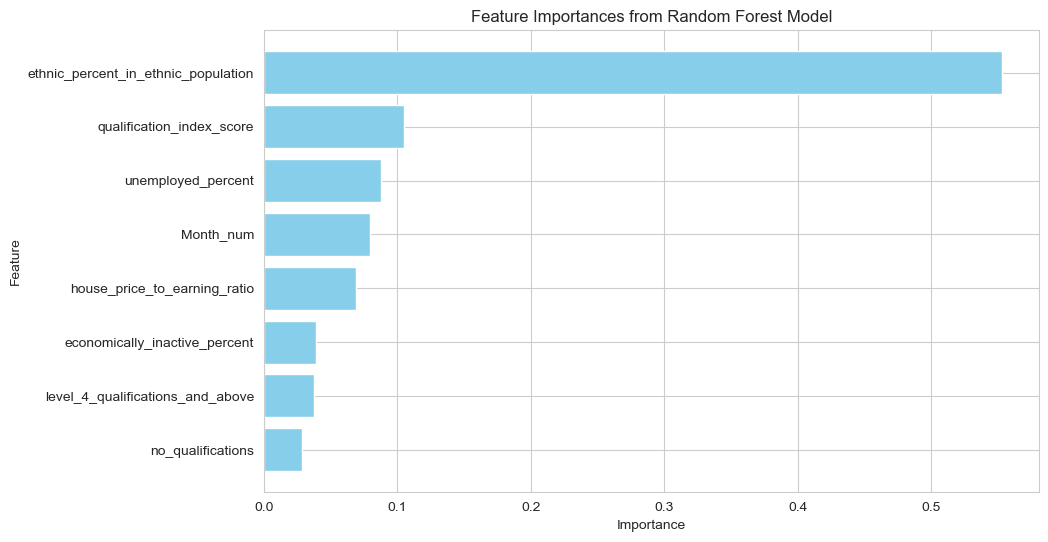

,Feature,Importance
0,ethnic_percent_in_ethnic_population,0.552958
4,qualification_index_score,0.104826
3,unemployed_percent,0.087939
7,Month_num,0.079301
1,house_price_to_earning_ratio,0.069458
2,economically_inactive_percent,0.039215
6,level_4_qualifications_and_above,0.037969
5,no_qualifications,0.028335


In [4]:
import matplotlib.pyplot as plt

# Extract feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to view the importances
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

importances_df


### Image 1: Feature Importances from Random Forest Model

**Insights**:
- **Ethnic Percent in Ethnic Population**: This feature shows the highest importance, indicating it has the most significant influence on predicting crime rates according to the Random Forest model. High importance might suggest that areas with certain ethnic population percentages see varying crime rates, reflecting how demographic factors significantly impact social dynamics and, consequently, crime.
- **Qualification Index Score and Unemployed Percent**: These features also demonstrate substantial importance, highlighting the strong ties between education levels, employment status, and crime rates. Higher education often correlates with lower crime rates, while higher unemployment can increase crime rates.
- **Month_num**: This indicates that the time of year (month) has a noticeable but lesser influence compared to demographic and economic factors. Seasonal trends can affect crime rates, with variations possibly due to weather, holiday seasons, or economic cycles.
- **House Price to Earning Ratio**: This economic indicator shows a moderate influence, pointing to the stressors that financial strain can place on communities, potentially leading to higher crime rates.
- **Economically Inactive Percent, Level 4 Qualifications and Above, No Qualifications**: These features have the least importance in the model, suggesting that while they play a role in crime rate predictions, their impact is less pronounced compared to other features.


**Purpose**:
This cell aims to analyze the importance of each feature in predicting the crime count using the trained Random Forest model. Understanding feature importance helps in identifying which factors are most influential in the prediction, providing insights that can inform policy decisions or further studies.

**Code Explanation**:
1. **Extracting Feature Importances**:
   - `feature_importances = rf_model.feature_importances_`: Retrieves the importance of each feature used in the model. This attribute of the Random Forest algorithm provides a measure of the quality of each feature in making accurate predictions.

2. **Creating a DataFrame for Feature Importances**:
   - `feature_names = X.columns`: Captures the names of the features from the feature DataFrame `X`.
   - `importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})`: Creates a new DataFrame that maps each feature to its importance.
   - `importances_df.sort_values(by='Importance', ascending=False, inplace=True)`: Sorts the DataFrame by the importance of the features in descending order, which helps in quickly identifying the most significant predictors.

3. **Plotting Feature Importances**:
   - `plt.figure(figsize=(10, 6))`: Sets up the figure size for the plot.
   - `plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')`: Creates a horizontal bar plot displaying the importance of each feature. The use of a horizontal bar plot makes it easier to read the feature names.
   - `plt.xlabel('Importance')`, `plt.ylabel('Feature')`, and `plt.title('Feature Importances from Random Forest Model')`: Label the axes and provide a title for the plot, enhancing readability and context.
   - `plt.gca().invert_yaxis()`: Inverts the y-axis of the plot to display the most important features at the top, improving the visual presentation for quick assessment.

**Output**:
- The cell produces a bar plot visualizing the importance of each feature in the model. Additionally, the `importances_df` DataFrame containing the sorted feature importances is available for further analysis or reporting.

**Theoretical Concepts**:
- **Feature Importance**: This metric helps to understand the "strength" or "impact" of each feature in the model's predictions. Features with higher importance are more influential in predicting the target variable, in this case, the crime count.
- **Data Visualization**: The bar plot provides a clear, visual representation of the data, making it easier to digest complex information and communicate findings to non-technical stakeholders.

This cell is crucial for the interpretability of the machine learning model, as it not only reveals which features are most important but also helps in understanding the underlying patterns in the data that influence crime rates.


### SHAP Values Calculation and Visualization

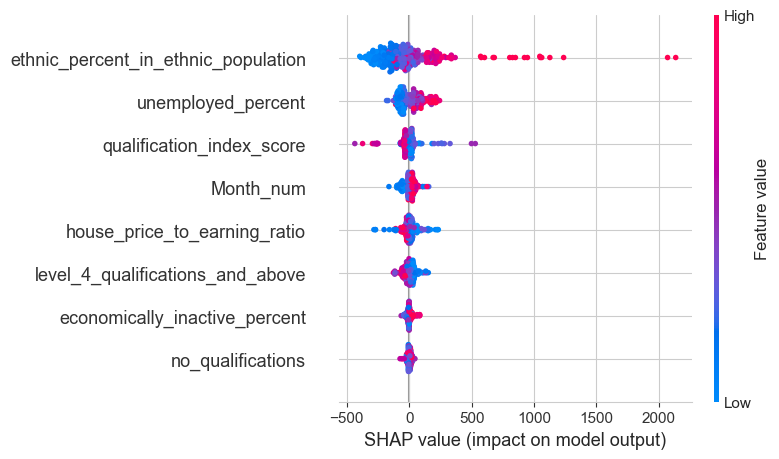

In [6]:
import shap

# Initialize the SHAP Explainer with the Random Forest model
explainer = shap.Explainer(rf_model, X_train, check_additivity=False)

# Calculate SHAP values for a subset of the test set to ensure it's not data specific
subset_X_test = X_test.sample(frac=0.6, random_state=42)  # Using 10% of the test data
shap_values = explainer(subset_X_test)

# Summary plot of SHAP values for all features in the subset
shap.summary_plot(shap_values, subset_X_test)


### Image 2: SHAP Value Scatter Plot

**Insights**:
- **Ethnic Percent in Ethnic Population**: This feature's SHAP values are widely spread, indicating diverse impacts on the model's output. Higher values (indicating a higher percentage of a particular ethnic group) seem to have both high positive and negative impacts on crime rates, suggesting complex interactions where the effect may depend on additional contextual factors.
- **Qualification Index Score**: Shows a concentration of higher positive impacts (indicated by the color scale), reinforcing that higher educational attainment within a community might reduce crime rates.
- **Unemployed Percent**: Displays a significant positive impact on increasing crime rates, which is consistent with economic theories that link unemployment with higher crime activities.


**Purpose**:
This cell utilizes SHAP (SHapley Additive exPlanations) values to interpret the Random Forest model's predictions. SHAP values provide a detailed and intuitive understanding of how each feature contributes to each prediction, offering transparency in the model's decision-making process.

**Code Explanation**:
1. **Importing SHAP Library**:
   - `import shap`: Imports the SHAP library, which is designed to explain prediction models by computing the contribution of each feature to the prediction.

2. **Initializing SHAP Explainer**:
   - `explainer = shap.Explainer(rf_model, X_train, check_additivity=False)`: Creates a SHAP explainer object for the Random Forest model trained earlier. The explainer uses the training set `X_train` to understand how the model behaves. The `check_additivity` parameter set to `False` can sometimes be necessary for complex models where the SHAP values and model outputs do not perfectly add up due to numerical precision issues.

3. **Calculating SHAP Values for Test Subset**:
   - `subset_X_test = X_test.sample(frac=0.6, random_state=42)`: Creates a random subset of the test data (60% of it) to calculate SHAP values. This subset ensures that the SHAP values are not overly specific to a particular set of data points.
   - `shap_values = explainer(subset_X_test)`: Computes the SHAP values for the subset. These values represent the impact of each feature on the prediction output for each instance in the subset.

4. **Visualizing SHAP Values**:
   - `shap.summary_plot(shap_values, subset_X_test)`: Generates a summary plot of the SHAP values. This visualization shows the distribution of the impacts each feature has on the model output. Features are ordered by the sum of SHAP value magnitudes across all samples, and a color scale indicates the feature value (red high, blue low).

**Output**:
- A summary plot that visually represents the contribution of each feature to the predictions in the form of a SHAP value. This plot is instrumental in understanding which features are most influential and how different values of a feature affect the prediction.

**Theoretical Concepts**:
- **SHAP Values**: These values are derived from game theory and provide a fair allocation of each feature's contribution to a prediction. They offer a powerful framework for model interpretability because they not only tell us how much a feature contributes but also how that contribution is positive or negative.
- **Model Interpretability**: In complex models, especially in critical areas like healthcare or finance, understanding why a model makes a certain decision is as important as how accurate the model is. SHAP values help in demystifying the model's decisions, making them more transparent.

This cell is essential for those who need to explain model predictions in terms of real-world effects, providing insights that can inform strategic decisions and ensure the model's decisions are justified and understandable.


### Calculating SHAP Values and Handling Potential Issues

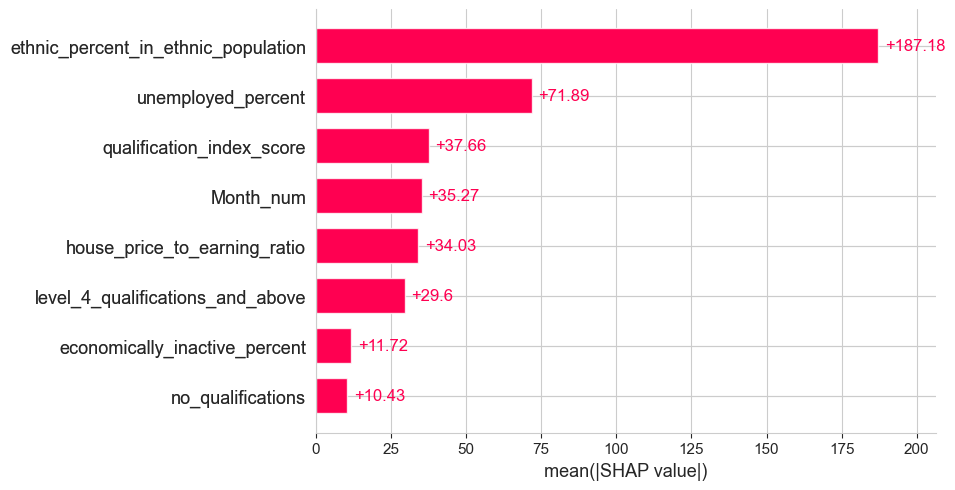

In [7]:
import shap
import numpy as np

# Initialize the SHAP Explainer with the Random Forest model, bypassing the additivity check
explainer = shap.Explainer(rf_model, X_train, check_additivity=False)

# Calculate SHAP values for a subset of the test set
subset_X_test = X_test.sample(frac=0.6, random_state=42)  # Using 10% of the test data
shap_values = explainer(subset_X_test)

# Check for NaNs or infinite values in SHAP values
if np.any(np.isnan(shap_values.values)) or np.any(np.isinf(shap_values.values)):
    print("SHAP values contain NaN or infinite values.")
else:
    # Attempt a simpler summary plot
    shap.plots.bar(shap_values)


### Image 3: SHAP Value Summary Bar Plot

**Insights**:
- **Ethnic Percent in Ethnic Population**: Dominates with the highest mean SHAP value, affirming its critical role as observed in the Random Forest feature importances. This suggests that variations in this demographic feature are crucial in modulating crime rates.
- **Unemployed Percent**: Again shows a strong positive mean SHAP value, corroborating its significant role in influencing higher crime rates.
- **Qualification Index Score and Month_num**: These features also show substantial impacts but less than ethnic demographics and unemployment, aligning with the insights from the Random Forest model about their significant but relatively lower influence on crime rates.

**Purpose**:
This cell utilizes SHAP values to analyze the contribution of each feature to the Random Forest model's predictions, specifically focusing on handling and checking for potential numerical issues such as NaNs (Not a Number) or infinite values in the SHAP values. This step is crucial for ensuring the reliability and interpretability of the SHAP analysis.

**Code Explanation**:
1. **Importing Necessary Libraries**:
   - `import shap`: Imports the SHAP library, used for computing and visualizing the SHAP values which explain the effect of the features on the model's predictions.
   - `import numpy as np`: Imports NumPy, a fundamental package for scientific computing in Python, used here to handle numerical operations and checks.

2. **Initializing SHAP Explainer**:
   - `explainer = shap.Explainer(rf_model, X_train, check_additivity=False)`: Initializes a SHAP Explainer object for the Random Forest model using the training data. The `check_additivity=False` parameter allows bypassing the additivity check, which can sometimes cause problems if the model outputs and SHAP values don't perfectly add up due to numerical precision issues.

3. **Calculating SHAP Values**:
   - `subset_X_test = X_test.sample(frac=0.6, random_state=42)`: Samples 60% of the test data to calculate the SHAP values, ensuring that the analysis is robust and not too data-specific.
   - `shap_values = explainer(subset_X_test)`: Computes SHAP values for the sampled test data.

4. **Checking for Numerical Issues in SHAP Values**:
   - `if np.any(np.isnan(shap_values.values)) or np.any(np.isinf(shap_values.values))`: Checks if the SHAP values contain any NaN or infinite values using NumPy functions `isnan()` and `isinf()`. These checks are important because such values can indicate problems during the computation of SHAP values and can render them unreliable or incorrect.
   - `print("SHAP values contain NaN or infinite values.")`: If any NaNs or infinities are found, it prints a warning message.

5. **Visualizing SHAP Values**:
   - If no NaNs or infinities are detected, a simpler summary plot (`shap.plots.bar(shap_values)`) is created. This bar plot provides a straightforward visualization of the average impact of each feature on the model output, making it easier to interpret the results.

**Output**:
- Depending on the condition check, the output might be a warning message about data quality issues in SHAP values, or a bar plot visualizing the average impact of each feature.

**Theoretical Concepts**:
- **SHAP Values and Model Interpretability**: SHAP values are rooted in game theory and provide a fair allocation of the output's change to each input feature, offering a coherent explanation of how each feature contributes to the prediction.
- **Numerical Stability in Computational Tasks**: Handling NaNs and infinities is a common issue in computational tasks, especially when dealing with complex models and large data. Proper checks and balances are crucial for maintaining the integrity and reliability of the analyses.

This cell not only highlights the importance of understanding the feature contributions through SHAP values but also emphasizes the need for rigorous data quality checks to ensure that the interpretations drawn from the model are accurate and trustworthy.

The outcomes of the predictive model and the insights derived from the analysis of feature importances and SHAP values offer a robust foundation for targeted crime prevention strategies. Here's how these outcomes can be leveraged to help reduce crime rates:

### Strategic Implications for Crime Reduction:

1. **Focus on Key Socioeconomic Factors**:
   - **Ethnic Composition and Integration**: The high importance and impact of ethnic demographics suggest that policies aimed at improving social integration, community cohesion, and equality could significantly influence crime rates. Initiatives that enhance dialogue and cooperation among diverse ethnic groups can foster a more inclusive community environment.
   - **Employment Opportunities**: With unemployment showing a strong positive impact on crime rates, enhancing job creation efforts, particularly in areas with high unemployment rates, can be crucial. Programs that offer vocational training, career counseling, and job placement services could help mitigate crime by providing viable economic alternatives.
   - **Educational Programs**: Given the significant role of educational attainment, investing in education, particularly in underprivileged areas, can be a long-term crime reduction strategy. Enhancing access to quality education and adult learning opportunities can equip individuals with the skills needed to thrive economically.

2. **Data-Driven Policing**:
   - Utilize the model’s predictive capability to anticipate areas and times with potential high crime rates, allowing law enforcement agencies to allocate resources more effectively. This proactive approach can help in deterring crime through increased patrols and presence in identified high-risk areas.

3. **Community Engagement**:
   - Engaging communities in safety initiatives can be more effective when based on data-driven insights. Programs designed to address specific community needs, such as youth engagement activities during months with historically higher crime rates, can prevent crime by providing alternatives and reducing idle time.

4. **Policy Formulation**:
   - Policymakers can use the insights from the model to formulate or adjust policies related to housing, social welfare, and urban planning. For instance, addressing the house price to earning ratio could help alleviate economic pressures that may lead to crime.

### Conclusion:

The comprehensive analysis conducted using the predictive model, alongside the interpretation of feature importances and SHAP values, offers actionable insights that can guide the development of targeted crime reduction strategies. By focusing on the identified key factors that influence crime rates and implementing community-centric, inclusive, and data-driven approaches, it is possible to achieve a significant reduction in crime. This holistic approach not only addresses the symptoms but also the root causes of crime, paving the way for creating safer and more resilient communities. The effective use of predictive analytics ensures that these strategies are both proactive and adaptive, aligning closely with the dynamic nature of urban environments and societal changes.